<a href="https://colab.research.google.com/github/Blacklotus89898/Financial-Analysis-Engine/blob/main/src/sandbox/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trading Practice

## Yfinance

In [ ]:
# Setup and imports
import yfinance as yf

target_company = "AAPL"
target_period = "1mo" # 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
target_interval = "1d" # 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo

# Get data
ticker = yf.Ticker(target_company)  # Apple Inc., include nvidia, tesla,
# data = ticker.history(period=target_period, interval=target_interval)
# print(data)

In [ ]:
# Generic info
target_info_fields = ["sector", "marketCap"]

info = ticker.info
# print(info)
print("----- Company Info -----")
print(f"Company: {info['longName']}")
for field in target_info_fields:
    print(f"{field}: {info[field]}")


# - ticker.financials: Income statement
# - ticker.balance_sheet: Balance sheet
# - ticker.cashflow: Cash flow statement
# - ticker.recommendations: Analyst ratings
print("----- Financial Statements -----")
print(ticker.financials)

print("----- Balance Sheet -----")
print(ticker.balance_sheet)

print("----- Cash Flow Statement -----")
print(ticker.cashflow)

print("----- Analyst Recommendations -----")
print(ticker.recommendations)


----- Company Info -----
Company: Apple Inc.
sector: Technology
marketCap: 4040889204736
----- Financial Statements -----
                                                      2025-09-30  \
Tax Effect Of Unusual Items                         0.000000e+00   
Tax Rate For Calcs                                  1.560000e-01   
Normalized EBITDA                                   1.447480e+11   
Net Income From Continuing Operation Net Minori...  1.120100e+11   
Reconciled Depreciation                             1.169800e+10   
Reconciled Cost Of Revenue                          2.209600e+11   
EBITDA                                              1.447480e+11   
EBIT                                                1.330500e+11   
Net Interest Income                                          NaN   
Interest Expense                                             NaN   
Interest Income                                              NaN   
Normalized Income                                   1.120100e+

## Matplotlib

C:\Users\songy\AppData\Local\Temp\ipykernel_53368\2492132335.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period="1y")["Close"]
[*********************100%***********************]  6 of 6 completed
C:\Users\songy\AppData\Local\Temp\ipykernel_53368\2492132335.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period="5y")["Close"]
[*********************100%***********************]  6 of 6 completed
C:\Users\songy\AppData\Local\Temp\ipykernel_53368\2492132335.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period=period, interval=interval)["Close"]
[*********************100%***********************]  6 of 6 completed


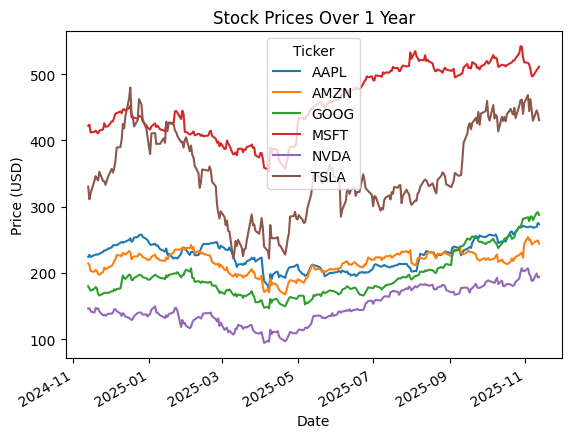

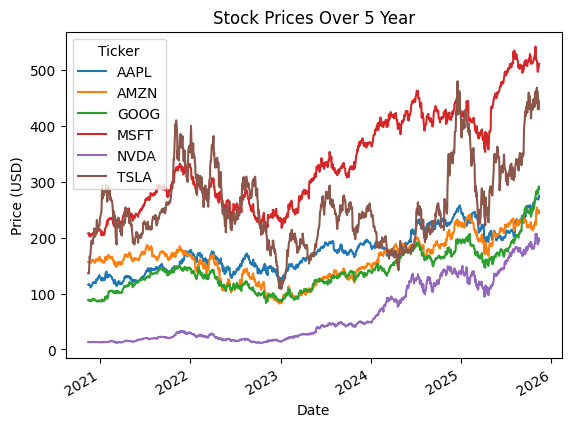

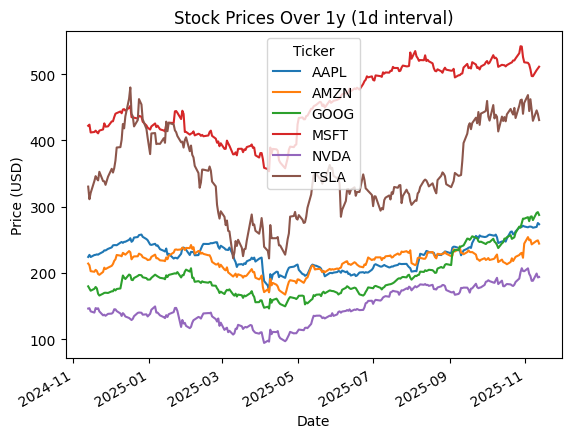

C:\Users\songy\AppData\Local\Temp\ipykernel_53368\2492132335.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period=period, interval=interval)["Close"]
[*********************100%***********************]  6 of 6 completed


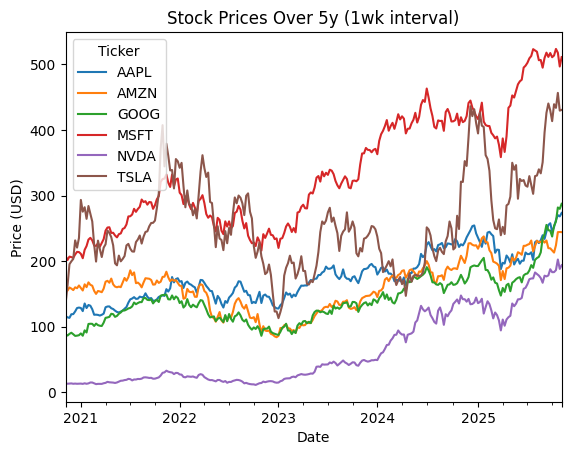

In [ ]:
import matplotlib.pyplot as plt
# Target companies
tickers = ["AAPL", "MSFT", "GOOG", "AMZN", "TSLA", "NVDA"]

data = yf.download(tickers, period="1y")["Close"]
data.plot(title="Stock Prices Over 1 Year")
plt.xlabel("Date")
plt.ylabel("Price (USD)")

data = yf.download(tickers, period="5y")["Close"]
data.plot(title="Stock Prices Over 5 Year")
plt.xlabel("Date")
plt.ylabel("Price (USD)")


def plot_stock_prices(tickers, period, interval):
    data = yf.download(tickers, period=period, interval=interval)["Close"]
    data.plot(title=f"Stock Prices Over {period} ({interval} interval)")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.show()

plot_stock_prices(tickers, "1y", "1d")
plot_stock_prices(tickers, "5y", "1wk")

## Relationship Analysis

### Pearson Correlation Coefficient - TODO: make functions for rolling, regression and heatmap correlation

| Goal                             | Ideal Correlation         |
|----------------------------------|----------------------------|
| Diversification                  | Low or negative (< +0.3)  |
| Trend confirmation / pairs trading | High positive (> +0.7)    |
| Hedging / risk reduction         | Negative (< 0)            |


C:\Users\songy\AppData\Local\Temp\ipykernel_53368\1494236593.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start, end=end)["Close"]
[*********************100%***********************]  5 of 5 completed

Correlation matrix:
Ticker      AAPL      AMZN      GOOG      META      MSFT
Ticker                                                  
AAPL    1.000000  0.575187  0.519210  0.506624  0.510813
AMZN    0.575187  1.000000  0.541658  0.680670  0.601786
GOOG    0.519210  0.541658  1.000000  0.455225  0.485100
META    0.506624  0.680670  0.455225  1.000000  0.673880
MSFT    0.510813  0.601786  0.485100  0.673880  1.000000 



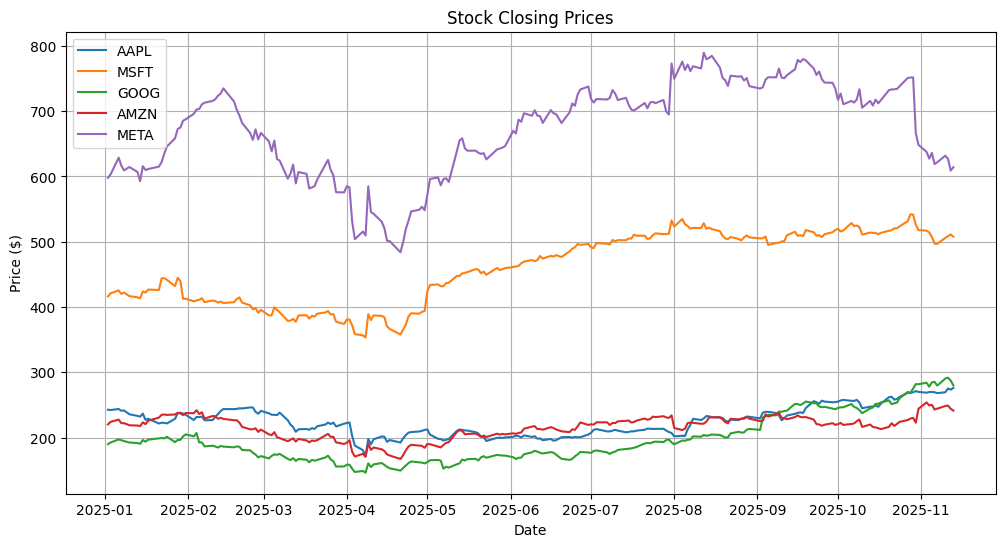

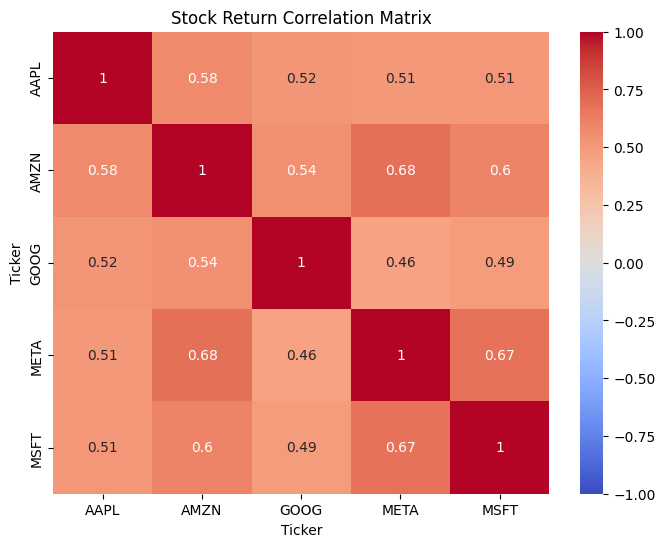

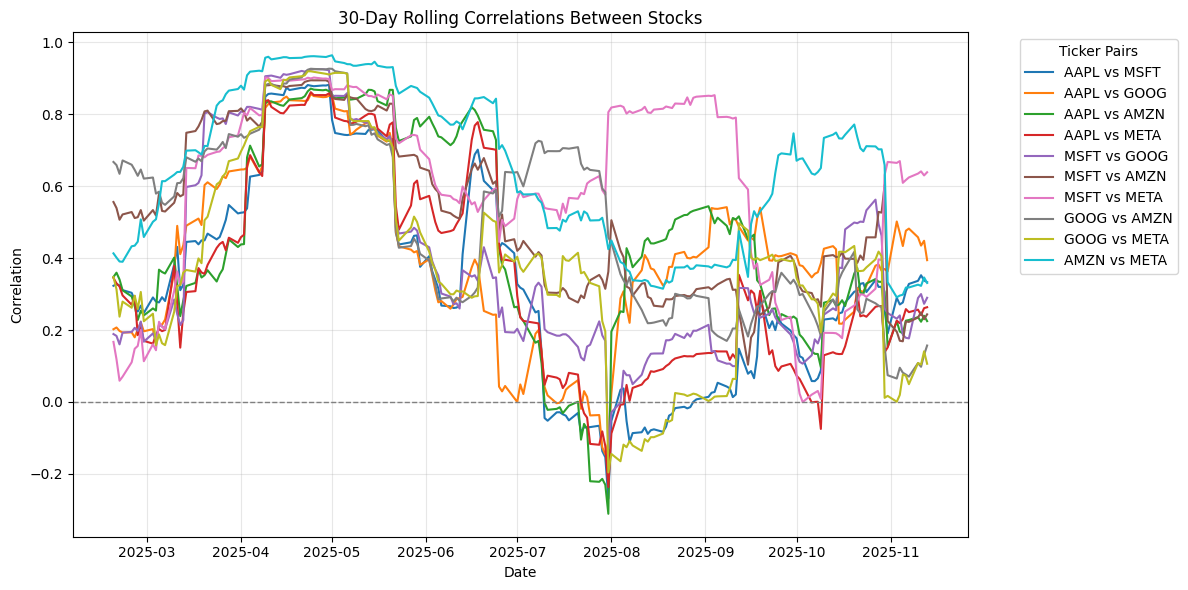

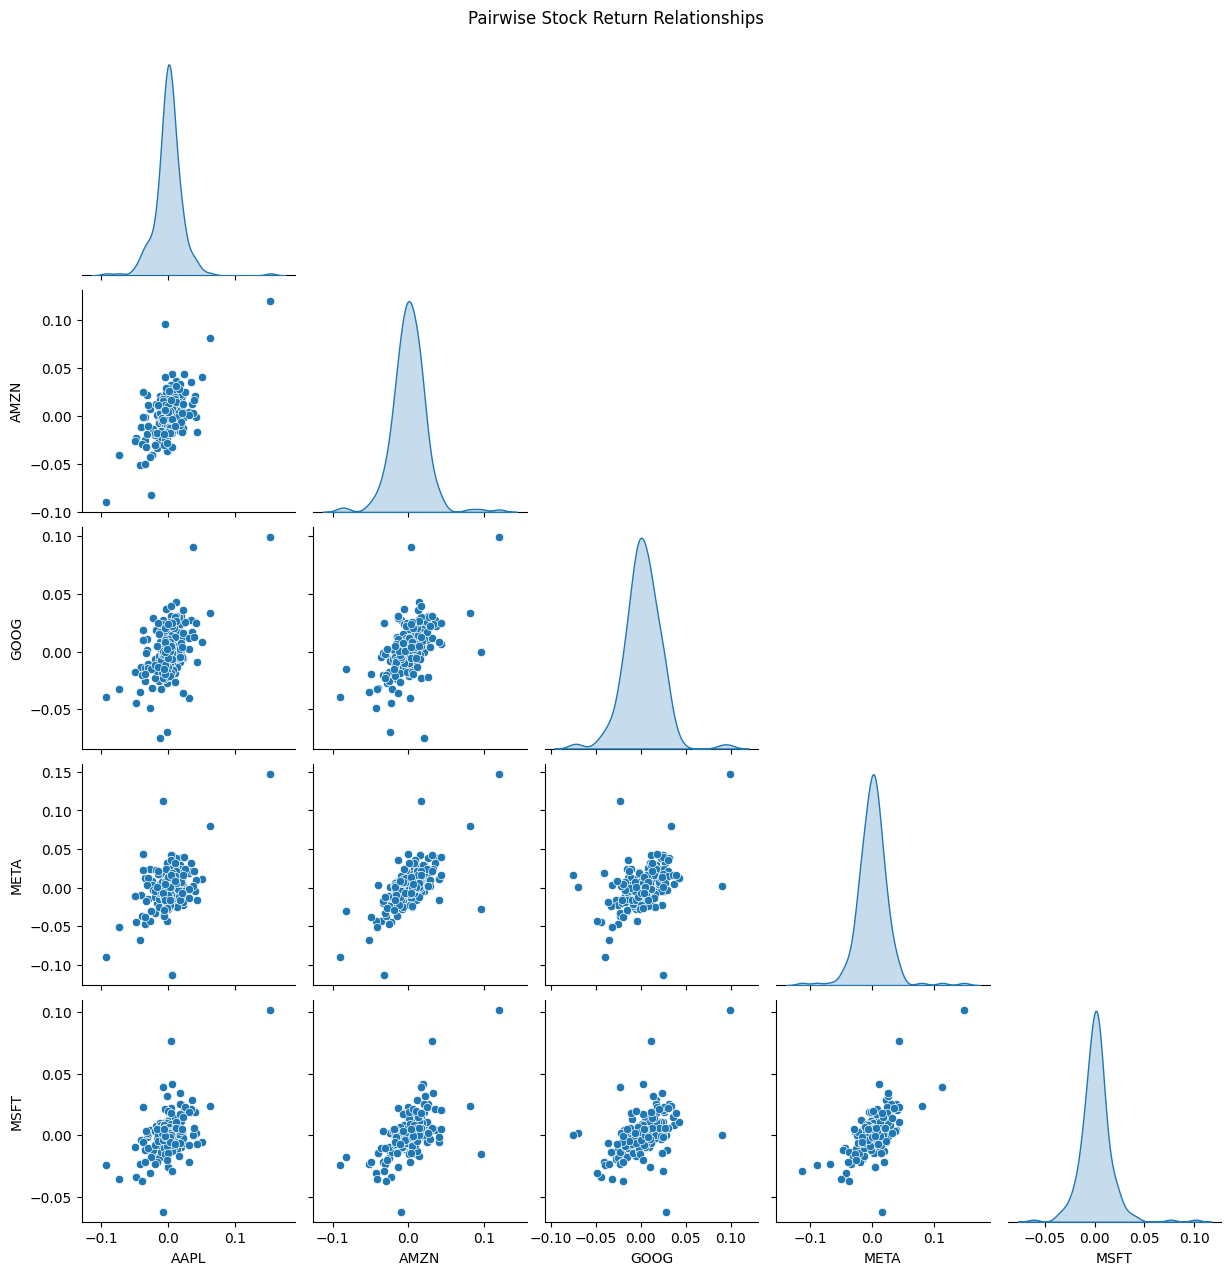

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def download_price_data(tickers, start, end):
    data = yf.download(tickers, start=start, end=end)["Close"]
    return data

def compute_daily_returns(price_data):
    return price_data.pct_change().dropna()

def print_correlation_matrix(returns):
    corr_matrix = returns.corr()
    print("Correlation matrix:")
    print(corr_matrix, "\n")
    return corr_matrix

def plot_price_history(price_data, tickers):
    plt.figure(figsize=(12, 6))
    for ticker in tickers:
        plt.plot(price_data.index, price_data[ticker], label=ticker)
    plt.title("Stock Closing Prices")
    plt.xlabel("Date")
    plt.ylabel("Price ($)")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_correlation_heatmap(corr_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title("Stock Return Correlation Matrix")
    plt.show()

def plot_rolling_correlation(returns, tickers, window=30):
    plt.figure(figsize=(12, 6))

    # Loop through each unique pair of tickers
    for i, ticker1 in enumerate(tickers):
        for ticker2 in tickers[i+1:]:
            rolling_corr = returns[ticker1].rolling(window=window).corr(returns[ticker2])
            plt.plot(rolling_corr, label=f"{ticker1} vs {ticker2}")

    # Formatting
    plt.title(f"{window}-Day Rolling Correlations Between Stocks")
    plt.axhline(0, color="gray", linestyle="--", linewidth=1)
    plt.xlabel("Date")
    plt.ylabel("Correlation")
    plt.legend(title="Ticker Pairs", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_pairwise_scatter(returns):
    sns.pairplot(returns, corner=True, diag_kind='kde')
    plt.suptitle("Pairwise Stock Return Relationships", y=1.02)
    plt.show()

# === Main Execution ===
tickers = ["AAPL", "MSFT", "GOOG", "AMZN", "META"]
start_date = "2025-01-01"
end_date = "2025-11-14"

price_data = download_price_data(tickers, start_date, end_date)
returns = compute_daily_returns(price_data)
corr_matrix = print_correlation_matrix(returns)

plot_price_history(price_data, tickers)
plot_correlation_heatmap(corr_matrix)
plot_rolling_correlation(returns, tickers)
plot_pairwise_scatter(returns)

## Data Science

### Data processing
### Visualization
### Plotting: pie, graph, bars, matrix
### Expected, variance, KL divergrence, conditionals probability

### Linear Regression

### Logistic Regression

### Random Forest

### Gradient Boosting (XGBoost / LightGBM)

### K-Means

### PCA

### MLP & NN

### Transformers